In [ ]:
import os
from zipfile import ZipFile
import pandas as pd
zip_path = "/content/drive/MyDrive/Colab Notebooks/data.zip"
extracted_path = "/content/"

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)


In [ ]:
folder_path = '/content/data'

df_2d = pd.read_csv(os.path.join(folder_path, 'data_2d.csv'))

df_mnist = pd.read_csv(os.path.join(folder_path, 'mnist.csv'))

mnist_labels_column = labels_column = df_mnist.iloc[:, 0]
df_mnist = df_mnist.drop(columns=df_mnist.columns[0])
print(df_mnist)
print(mnist_labels_column)

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.658  0.659  0.660  \
0    0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1    0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2    0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3    0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4    0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
..  ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...    ...   
494  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
495  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
496  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
497  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
498  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

     0.661  0.662  0.663  0

In [ ]:
df_2d
print(df_2d.describe())

       0.000000000000000000e+00  -7.687164597386728637e-01  \
count                199.000000                 199.000000   
mean                   0.502513                   1.771587   
std                    0.501255                   1.230001   
min                    0.000000                  -1.488928   
25%                    0.000000                   0.880885   
50%                    1.000000                   1.736607   
75%                    1.000000                   2.707277   
max                    1.000000                   4.554605   

       4.608603078297135447e-01  
count                199.000000  
mean                   2.220299  
std                    1.604383  
min                   -1.344141  
25%                    0.979439  
50%                    2.283748  
75%                    3.608612  
max                    5.722027  


In [ ]:
df_mnist


,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


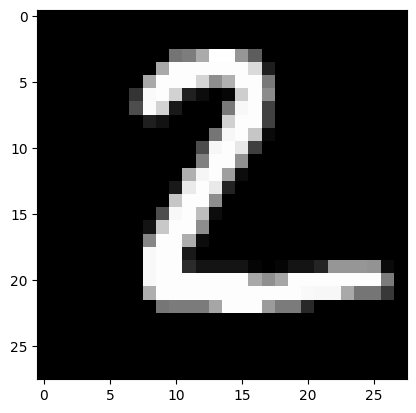

In [ ]:
first_image = df_mnist.iloc[0, :].values.reshape(28, 28)

plt.imshow(first_image, cmap='gray')
plt.show()

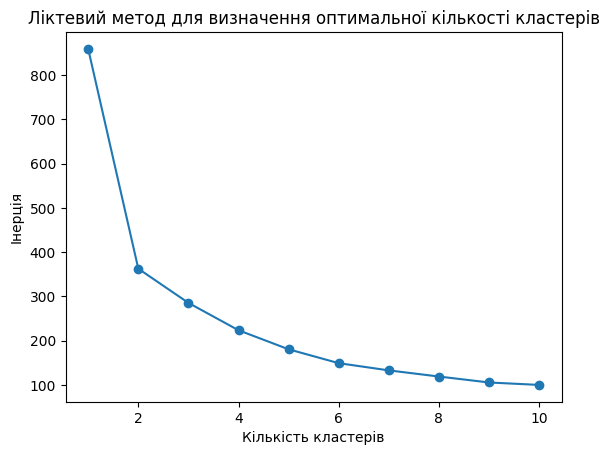

[858.964541763682, 362.7751486474807, 285.58871565263007, 223.79247830598484, 180.7874525339056, 149.46520054001888, 133.18392288394125, 119.30636677972757, 105.8722371715926, 100.35401522361411]


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

k_values = range(1, 11)
inertia_values = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(df_2d)
    inertia_values.append(kmeans.inertia_)


plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.title('Ліктевий метод для визначення оптимальної кількості кластерів')
plt.show()
print(inertia_values)

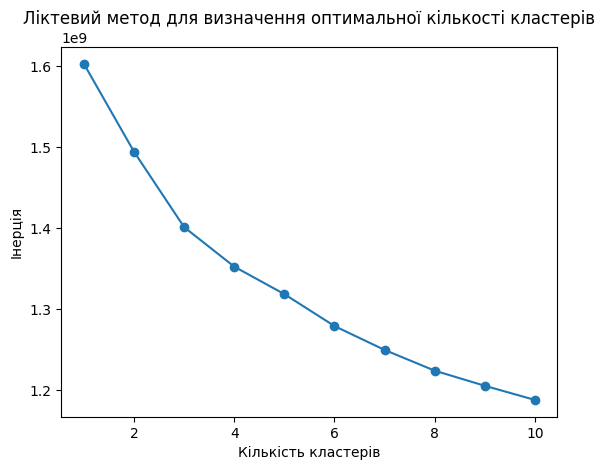

[1602780496.5290575, 1494187312.4632442, 1400972226.4511247, 1352182769.954385, 1318207985.2230036, 1278749623.7252395, 1249233819.9106374, 1223587479.9826617, 1204905017.860466, 1187416148.009169]


In [ ]:
k_values = range(1, 11)
inertia_values = []


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
    kmeans.fit(df_mnist)
    inertia_values.append(kmeans.inertia_)


plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.title('Ліктевий метод для визначення оптимальної кількості кластерів')
plt.show()
print(inertia_values)

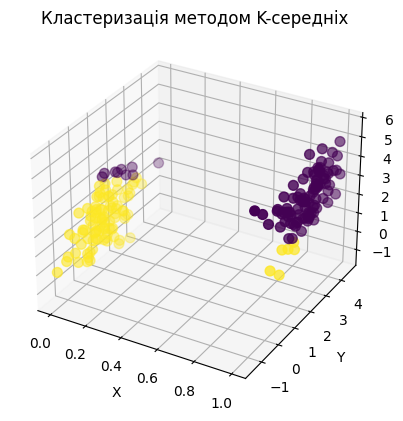

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

df_2d.columns = ['X', 'Y', 'Z']
n_clusters = 2

kmeans_3d = KMeans(n_clusters=n_clusters, n_init = 'auto', random_state=42)
df_2d['Cluster'] = kmeans_3d.fit_predict(df_2d)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_2d['X'], df_2d['Y'], df_2d['Z'], c=df_2d['Cluster'], cmap='viridis', s=50)
ax.set_title('Кластеризація методом K-середніх')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()



           PC1          PC2  labels
0   -75.847296 -1043.499584       2
1  -969.406400  -344.775023       1
2  1054.128637  -358.656520       0
3   420.940079   671.107210       4
4 -1002.828439  -302.511711       1


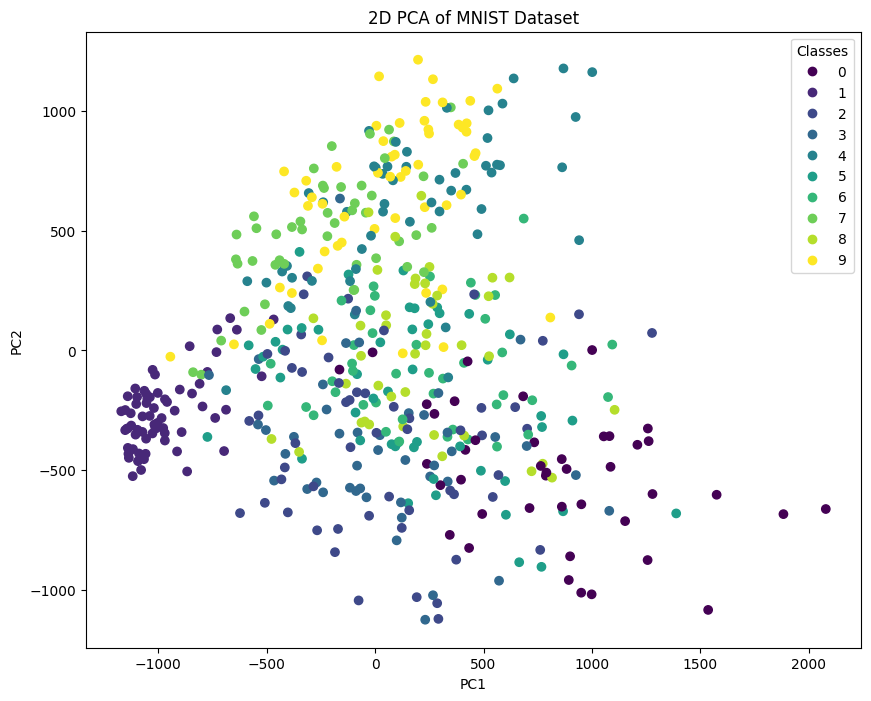

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_mnist_2d = pca.fit_transform(df_mnist)


mnist_2d = pd.DataFrame(data=df_mnist_2d, columns=['PC1', 'PC2'])
mnist_2d['labels'] = mnist_labels_column


print(mnist_2d.head())

plt.figure(figsize=(10, 8))
scatter = plt.scatter(mnist_2d['PC1'], mnist_2d['PC2'], c=mnist_2d['labels'], cmap='viridis')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D PCA of MNIST Dataset')
plt.show()

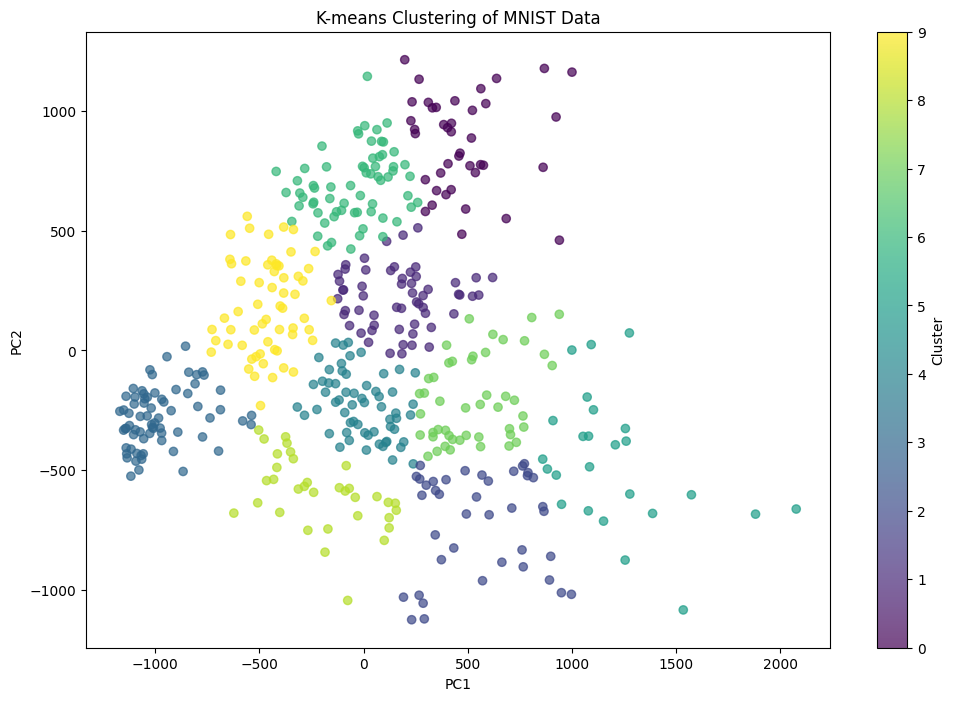

In [ ]:
kmeans = KMeans(n_clusters=10, n_init = 'auto', random_state=42)
clusters = kmeans.fit_predict(df_mnist_2d)

df_clusters = pd.DataFrame(data=df_mnist_2d, columns=['PC1', 'PC2'])
df_clusters['Cluster'] = clusters

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_clusters['PC1'], df_clusters['PC2'], c=df_clusters['Cluster'], cmap='viridis', alpha=0.7)
plt.title('K-means Clustering of MNIST Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.colorbar(scatter, label='Cluster')
plt.show()